<a href="https://colab.research.google.com/github/trekkateer/jcn6-CS-375/blob/main/notebooks/u03n1-linreg-manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression the Hard Way

Task: fit a linear regression by implementing the forward pass and the loss yourself.

## Objectives

- Explain each step in the forward pass of a linear regression model
- Understand the effects of parameters on predictions of a linear model
- Evaluate loss of a model on a dataset
- Explain what it means for a model to fit a dataset

## Setup

In [2]:
import numpy as np
np.set_printoptions(precision=3)
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

Suppose we have a dataset with just a single feature `x` and continuous outcome variable `y`. We'll have a few possible datasets; keep it at `toy` for now, but come back and try the others later.

x.shape (4,)
y_true.shape (4,)


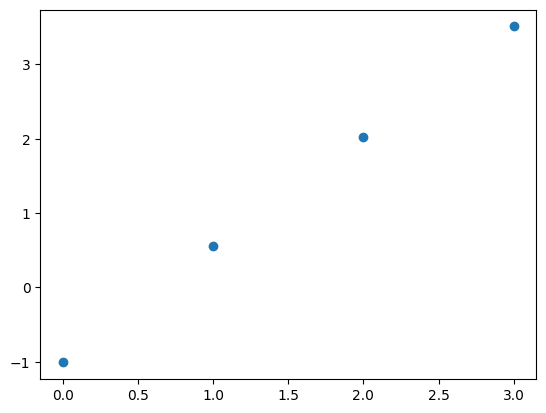

In [2]:
DATASET = 'toy'

if DATASET == 'toy':
    x = np.array([0, 1, 2, 3])
    y_true = np.array([-1.01, .56, 2.02, 3.51])
if DATASET == 'toy2':
    x = np.array([0, 1, 2, 3])
    y_true = np.array([-1, .5, 2.0, 25])
elif DATASET == "temps":
    data = pd.read_csv("https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv", skiprows=1)
    # Shape x to be items-by-features
    x = data.iloc[:, 0].values.astype(np.float32)
    # scale x to a reasonable range
    x -= 1880.0
    x /= 100.
    y_true = data.iloc[:, 1].values.astype(np.float32)

# Plot the data so we can see it
if len(x) < 50:
    plt.scatter(x, y_true)
else:
    plt.plot(x, y_true)
print("x.shape", x.shape)
print("y_true.shape", y_true.shape)

## Task

### Step 0: Initialize the model

We'll make a model with two parameters: the slope and the intercept. We'll initialize them randomly.

In [3]:
np.random.seed(0)
params = np.random.randn(2)

### Step 1: Single prediction

Fill in the blanks below to make a prediction for a single input `x`.

In [4]:
x_i = x[0] # pick an example data point
weight = params[0]
bias = params[1]

y_pred_i = x_i * weight + bias # 0.4001572083672233
print("predicted value:", y_pred_i)

predicted value: 0.4001572083672233


### Step 2: Prediction for all inputs

Fill in the blanks below to write a function that makes predictions for all inputs in a dataset. This is typically called the *forward pass*.

In [6]:
def linreg_forward(params, x):
    weight = params[0]
    bias = params[1]
    return x * weight + bias

y_pred = linreg_forward(params, x) # make predictions for all data points
print("predicted values:", y_pred) # [0.4   2.164 3.928 5.692]

predicted values: [0.4   2.164 3.928 5.692]


**Pause to reflect**:

- What are the shapes of `x`, `weight`, `bias`, and `y_pred`? What does each shape represent?
- If you had to write the function as a `for` loop instead of using broadcasting, how many times would the loop run?

#### Visualizing the predictions

Observe the plot of the predictions. **By eye, make a very rough estimate of what the *mean squared error* and *mean absolute error* might be.** Don't calculate them (we'll do that in the next step, don't peek ahead), just make a thoughtful guess, to one sigfig, based on the plot.

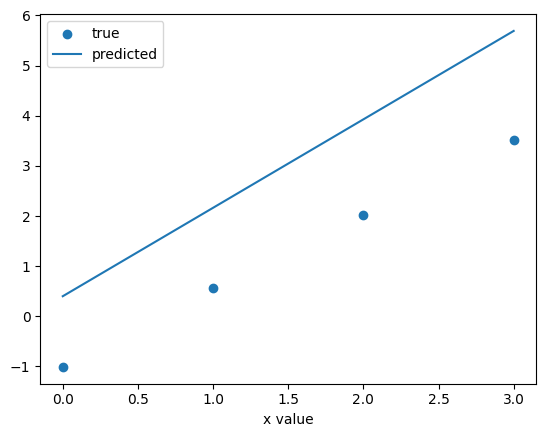

In [ ]:
def plot_predictions(x, y_true, y_pred):
    plt.scatter(x, y_true, label="true")
    plt.plot(x, y_pred, label="predicted")
    plt.legend()
    plt.xlabel("x value")

plot_predictions(x, y_true, y_pred)

- Approximate value of MSE: _0.25_
- Approximate value of MAE: _1_

### Step 3: Compute loss

Fill in the blanks below to compute the mean squared error and the mean absolute error loss for the predictions.

In [1]:
def compute_mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def compute_mae_loss(y_true, y_pred):
    return (abs(y_true - y_pred)).mean()

mse_loss = compute_mse_loss(y_true, y_pred)
print("MSE loss:", mse_loss)

mae_loss = compute_mae_loss(y_true, y_pred)
print("MAE loss:", mae_loss)

# MSE loss: 3.241497649037405
# MAE loss: 1.7762357273187195

NameError: name 'y_true' is not defined

### Step 4: Compute loss given parameters

Write a function that computes the loss given the parameters of the model and set of data points.

In [ ]:
def loss_given_params(params, x, y_true):
    y_pred = ...
    return compute_mse_loss(...)

loss = loss_given_params(params, x, y_true)
print("loss:", loss)

loss: 3.241497649037405


Now we can use an optimizer to find the best parameters for the model.

In [ ]:
from scipy.optimize import minimize

optimization_result = minimize(loss_given_params, params, args=(x, y_true))
fitted_params = optimization_result.x
print("fitted params:", fitted_params)

fitted params: [ 1.502 -0.983]


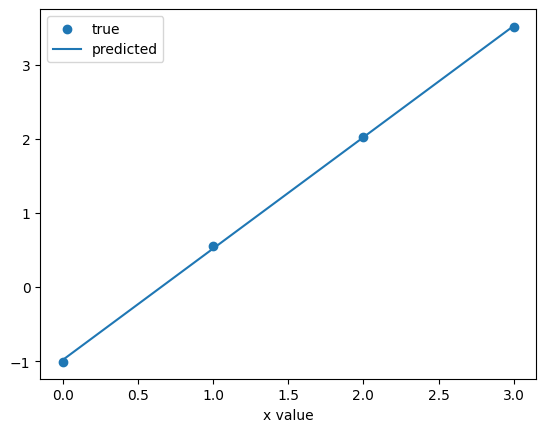

In [ ]:
plot_predictions(x, y_true, linreg_forward(fitted_params, x))

Now, use your functions above to compute the loss for the fitted parameters.

In [ ]:
y_pred = ...
print("MSE loss:", compute_mse_loss(..., ...))
print("MAE loss:", compute_mae_loss(..., ...))

MSE loss: 0.0006450000093661442
MAE loss: 0.020500116851778938


### Check in

Can you define the following terms?

- Forward pass
- Loss
- optimizer
- "Fitting" a model


## Guided Extension

- Switch the dataset to `toy2` and fit the model again. **How does the model deal with the outlier?**
- Switch the loss function to MAE loss and fit the model again. **How does the model deal with the outlier now?**

... your thoughts here ...